## Make all import

In [13]:
import pyfits
import os
import pprint
import numpy as np

from PyQt4 import QtCore, QtGui
from IPython.display import display
from ipywidgets import widgets

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
import matplotlib as mpl
font = {'family' : 'monospace',
       'size' : '14'}
mpl.rc('font', **font)

## Default folder 

In [4]:
default_dir = os.path.join('/Volumes','My Book Thunderbolt Duo', 'IPTS', 'IPTS-12534')
assert os.path.isdir(default_dir)

## Select and load raw images

In [5]:
%gui qt

In [6]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name.
    """
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
            dir, filter="FITS files (*.fits);; All files (*)")
    return fname

In [7]:
%gui qt
list_files = gui_fname(dir=default_dir)
%matplotlib inline

In [31]:
w = widgets.IntProgress(description="Loading raw data")
w.max = len(list_files)
display(w)

raw_data = []
for _index, _file in enumerate(list_files):
    _hdu_list = pyfits.open(_file)
    _data = _hdu_list[0]
    _image = np.asarray(_data.data)
    raw_data.append(_image)
    w.value = _index + 1

### Select OB files

In [32]:
%gui qt
list_ob_files = gui_fname(dir=default_dir)
%matplotlib inline

In [30]:
w = widgets.IntProgress(description="Loading OB data")
w.max = len(list_ob_files)
display(w)

ob_data = []
for _index, _file in enumerate(list_ob_files):
    _hdu_list = pyfits.open(_file)
    _data = _hdu_list[0]
    _image = np.asarray(_data.data)
    ob_data.append(_image)
    w.value = _index + 1

### Calculate Average OB 

In [34]:
average_ob_data = ob_data[0]
for _index, _ob in enumerate(ob_data[1:]):
    average_ob_data += _ob
average_ob_data = np.divide(average_ob_data, len(ob_data))

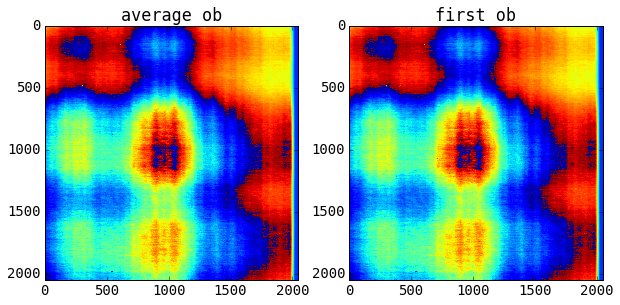

In [47]:
fig = plt.figure(figsize=(10,10))
ax_img = plt.subplot(121)
ax_img.imshow(average_ob_data)
ax_img.set_title("average ob")

ax_img2 = plt.subplot(122)
ax_img2.imshow(ob_data[0])
ax_img2.set_title("first ob")


### Normalize data

In [52]:
w = widgets.IntProgress(description="Loading OB data")
w.max = len(raw_data)
display(w)
_index = 0

normalized_data = []
for _data in raw_data:
    normalized_data.append(np.divide(_data, average_ob_data))
    w.value = _index + 1
    _index += 1

/Users/j35/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide


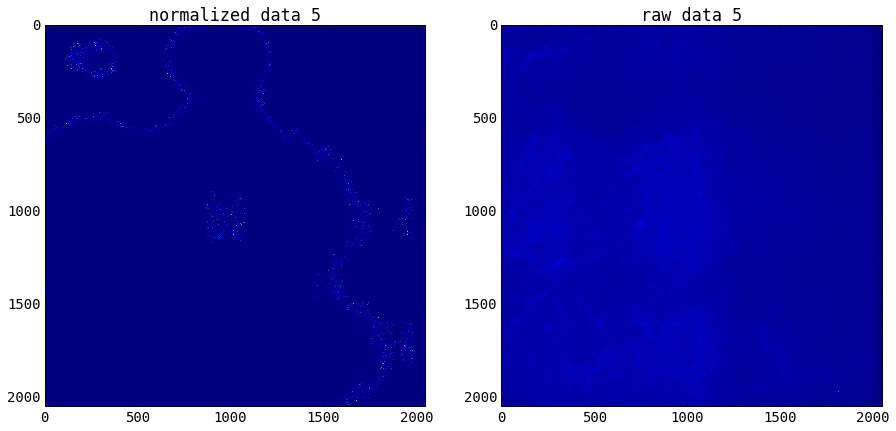

In [62]:
min_intensity = 0
max_intensity = 1000
image_to_display = 5

fig = plt.figure(figsize=(15,15))
ax_img = plt.subplot(121)
ax_img.imshow(normalized_data[image_to_display],
             vmin = min_intensity,
             vmax = max_intensity)
ax_img.set_title("normalized data {}".format(image_to_display))

ax_img2 = plt.subplot(122)
ax_img2.imshow(raw_data[image_to_display])
ax_img2.set_title("raw data {}".format(image_to_display))